<center><span style="font-size:40px;"><b>REINFORCEMENT LEARNING</b></span></center>

In [1]:
from IPython.display import Image, display

---

---

---

# 00 - INTRODUCTION

In traditional **Machine Learning**, solutions typically rely on a *supervisor* that provides labeled and meaningful data describing the phenomenon of interest. However, this approach is not always feasible. In many real-world situations, data cannot be pre-collected or labeled easily.  

**Reinforcement Learning (RL)** addresses this challenge by focusing on scenarios where data must be gathered *through interaction*. The agent explores and interacts with its environment—often without explicit instructions or prior knowledge—and learns how to make decisions that maximize a certain objective, typically expressed as a cumulative reward.  
Examples of RL: self-driving cars, algorithms to play chess...


### LIMITS OF SUPERVISED LEARNING

Supervised learning, though powerful, faces several limitations when applied to dynamic or interactive environments:

- Data may only become available through interaction with the world.
- Collected information is often indirect, providing only partial feedback on performance in the form of rewards rather than explicit labels.
- Time dependency matters: data points are not necessarily independent and identically distributed (i.i.d.), meaning that the order of events affects learning.
- Many supervised learning approaches fail to consider long-term consequences of actions, focusing instead on immediate outcomes.


### RL ELEMENTS

Reinforcement Learning formalizes the learning process through a set of well-defined elements:

> - **Agent**: the decision-maker attempting to solve a task.
> - **States**: all possible situations or configurations in which the agent may find itself.
> - **Actions**: the set of possible moves or decisions the agent can take (which may depend on the current state).
> - **Environment**: the external system the agent interacts with. It provides **rewards** in response to the agent’s actions and determines state transitions.
> - **Rewards**: feedback signals that indicate how good or bad an action was, guiding the agent toward its goal.
> - The agent may prioritize **long-term rewards** (maximizing future gains) rather than short-term ones.



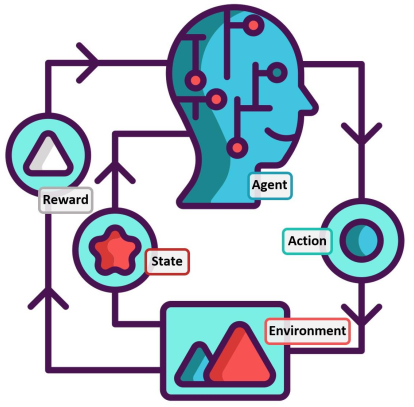

In [3]:
display(Image("./images/RL_elements.png", width=300))

### RL FEATURES

In Reinforcement Learning (RL), the **model of the environment is not known in advance**.  
Instead, the agent must **learn about the environment by interacting** with it and observing the outcomes of its actions.

The agent’s objective is not to perform optimally at every single step, but rather to **maximize long-term rewards** over time.  
This introduces the concept of **planning**, which is central to RL: decisions at each stage must account for their future impact.

For example, in chess, the *true* reward is obtained only at the end of the game (winning or losing). During play, even actions that seem negative—like sacrificing a piece—can be *optimal* if they lead to a better position and ultimately to victory.


Reinforcement Learning can be understood as both:
- a research area, which is a subfield of Machine Learning, and  
- a learning paradigm, focused on teaching an agent how to control a system with many unknown elements in order to maximize a numerical performance measure (the reward).

Unlike other paradigms, RL does not rely on pre-collected historical data. Instead, it **focuses on learning through direct interaction with the environment** rather than from fixed datasets and it focuses on achieving **long-term objectives**, not just immediate rewards.  

Examples of reinforcement Learning: Chatbots and dialogue systems; Autonomous agents (self-driving cars, drones, robots); Games (chess, Go, video games); HVAC systems for energy optimization; Trading and portfolio management; Online advertising and recommender systems; Healthcare and biological systems.

---

## 0.1 - MORE ON THE ELEMENTS

### REWARDS

A **reward** $R_t$ is a scalar feedback signal that measures how well the agent is performing at a given time step $t$.  
Here, a *time step* represents a discrete point in the interaction sequence between the agent and the environment. While continuous-time RL formulations exist, they are beyond the scope of this notebook. The **agent’s objective** is to maximize the **cumulative reward**, which is the sum—or sometimes a discounted sum—of all rewards collected over time. Actions may have long-term consequences, and rewards can be delayed rather than immediate. To achieve long-term success, the agent may need to sacrifice short-term rewards in favor of larger future gains. This is a trade-off.

We distinguish between two main types of tasks:

1. **Episodic tasks** – These have a clear beginning and end (e.g., games). Here the agent aims to maximize the total reward accumulated within an episode.
2. **Continuous tasks** – These go on indefinitely (e.g., controlling a data center or an industrial process). Here the agent focuses on maximizing rewards over a defined or rolling time horizon.

Reinforcement Learning is founded on the **reward hypothesis**, which states:

> *All goals can be represented as the maximization of the expected cumulative reward.*

### LINK BETWEEN AGENT, ACTIONS AND ENVIRONMENT

At each discrete time step $t$, the **agent** (the entity we control or program):

- Is in a **state** $S_t$, representing a complete description of the system (agent + environment) at time $t$;  
- Executes an **action** $A_t$, which must be feasible given $S_t$.

The **environment**, in response to the pair $(S_t, A_t)$:

- Provides a **reward** $R_{t+1}$;  
- Transitions the agent to a **new state** $S_{t+1}$.

This continuous interaction between agent and environment defines the feedback loop at the core of RL.

Technically, at each step, the agent receives an observation $O_{t+1}$ that represents partial or full information about the new state.

- In fully observable environments (like a chess board), we have $S_{t+1} = O_{t+1}$.  
- In partially observable environments (like dutring a poker game), the true state is not directly available and must be inferred from the history $H_t$, and the state can be represented as a function of this history:

$$H_t = (O_1, R_1, A_1, \dots, A_{t-1}, O_t, R_t), \quad \quad S_t = f(H_t)$$

When the state can be estimated reliably, the learning process becomes simpler.  
Otherwise, alternative strategies are required, such as:
- treating the entire history as the state, or  
- using supervised learning models to approximate the hidden state.

### COMPONENTS OF AN AGENT

A RL agent can be described through several components:

- **Policy ($\pi$):** defines the agent’s behavior, mapping states to actions. This is the fundamental and really needed element.
- **Value function ($V$):** estimates how *good* it is to be in a particular state.  
- **Action-value function ($Q$):** estimates how *good* a given state–action pair is.  
- **Model:** represents the agent’s internal understanding of the environment’s dynamics.

### POLICY

The policy is the core of a RL agent, defining how it selects actions based on the current state.  
**The ultimate goal of RL is to discover the optimal policy $\pi$ — the one that maximizes expected cumulative rewards**.

Policies can take two main forms:

- Deterministic policy:  
  $$a = \pi(s), \quad  \quad \quad \textit{with a=action and s=state}$$  
- Stochastic policy: defines a probability distribution over possible actions for each state.
  $$\pi(a|s) = \mathbb{P}[A_t = a \,|\, S_t = s]$$  

---

---

---

---

# 01 - MULTI-ARMED BANDITS

### 1.1 INTRODUCTION

The multi-armed bandit (or k-armed bandit) is a simple problem that captures the fundamental challenge of learning from experience while balancing exploration and exploitation.

A one-armed bandit is represented by the classic slot machine found in casinos.  
- The term "one-armed" refers to the single lever (or arm) that a player can pull after inserting a coin.  
- When pulled, the machine provides a reward (money), which may often be zero.  
- The term "bandit" comes from the fact that, in the long run, such machines tend to take more money than they give back.

Now imagine we have infinite coins and can play as many times as we want.  
Our goal is to learn how to maximize the total amount of money won by deciding how to act over many plays.

In the multi-armed bandit setting case, we have $k$ levers (actions) instead of just one. Each lever corresponds to a different slot machine, and each machine provides rewards following a different probability distribution — some are more generous than others.

At each episode (or play):
- The agent chooses one of the $k$ levers to pull.  
- It receives a stochastic reward, sampled from the lever’s reward distribution.  
- Over time, the agent must decide which lever to pull in order to maximize the cumulative reward.

This is an episodic task, as each play (episode) is independent from the previous ones.

#### EXAMPLE CLINICAL TRIALS

A simple analogy comes from clinical trials. A doctor wants to find the most effective treatment among several possible ones. Each patient represents an episode. Administering a treatment corresponds to choosing an action. The outcome of the treatment (e.g., recovery success) serves as the reward.

After a few patients, one treatment may appear more effective. But for the next patient, should the doctor:
- continue using the best-known treatment (exploitation), or  
- try a different one that might be even better (exploration)?

This lead us to the exploration–exploitation dilemma.

### EXPLORATION-EXPLOITATION TRADE-OFF
This is the essence of the exploration–exploitation dilemma:
- **Exploitation:** choosing the best-known action to maximize immediate reward.  
- **Exploration:** trying other actions to gather information that might lead to higher rewards in the future.

Exploration improves our knowledge for long-term benefit, while exploitation uses current knowledge for short-term gain. Because you cannot fully explore and exploit at the same time, implementing a trade-off between them is necessary.

### FORMAL DEFINITION OF THE MULTI-ARMED BANDIT PROBLEM

In the k-armed bandit problem:

- The agent has $k$ possible actions.  
- There is only one state since there is no concept of transition between different situations.  
- Each action provides a stochastic reward drawn from an unknown distribution. 

> We define the **action-value** of an action $a$. This represents the **expected reward obtained by taking action $a$**:  
> $$ q_*(a) = \mathbb{E}[R_t \,|\, A_t = a] $$


Note: here, $t$ typically refers to the episode number (not a time step within an episode, as in general RL problems).

> Since the true $q_*(a)$ values are unknown, the agent must estimate them through experience. A simple estimation method is the **sample-average method**:
> $$ Q_t(a) = \frac{\text{sum of rewards obtained by taking action } a}{\text{number of times action } a \text{ has been chosen}} $$

Each time a new reward is observed for an action, the estimate can be incrementally updated to refine the agent’s understanding of that action’s value.

But we have a problem: storing all past rewards is inefficient because memory and computation grow over time.  
Let's find an alternative. A compact incremental update formula that stores only $Q_n$ and $n$ and updates as new rewards arrive is:
$$Q_{n+1} = Q_n + \frac{1}{n}\big(R_n - Q_n\big).$$

### 1.2 GREEDY POLICY

We have to choose a policy for our agent: rule he has to follow in order to search for the best lever.

> With the greedy policy the selected action is:
> $$A_t = \arg\max_a Q_t(a)$$  

So this policy always picks the action with the highest estimated value. It is simple and often reasonable, but it suffers from an exploration problem: if we never try other actions, we can become stuck with a suboptimal option. We need to find possible solutions.

Common approaches to handle exploration/exploitation include 
1. $\varepsilon$-greedy
2. Greedy with optimistic initialization
3. Upper Confidence Bound (UCB)
4. Gradient Bandit methods (the only preference-based method)

### 1.2.1 $\varepsilon$-GREEDY POLICY

$\varepsilon$-greedy is a simple stochastic policy: with probability $1-\varepsilon$ select the greedy action, and with probability $\varepsilon$ select a non-greedy action (typically chosen uniformly). Here $\varepsilon\in(0,1)$ and is usually small (e.g., $0.1$ or $0.01$). This injects exploration while mostly exploiting the best-known action.

As we can see in the image below, having a large $\varepsilon$ could be beneficial in the first transient phase, because we have more exploration and so the best action is found earlier. But then this much exploration will hinder the performance trying too many useless options, while a smaller $\varepsilon$ will benefit more, sticking more often to the best action.

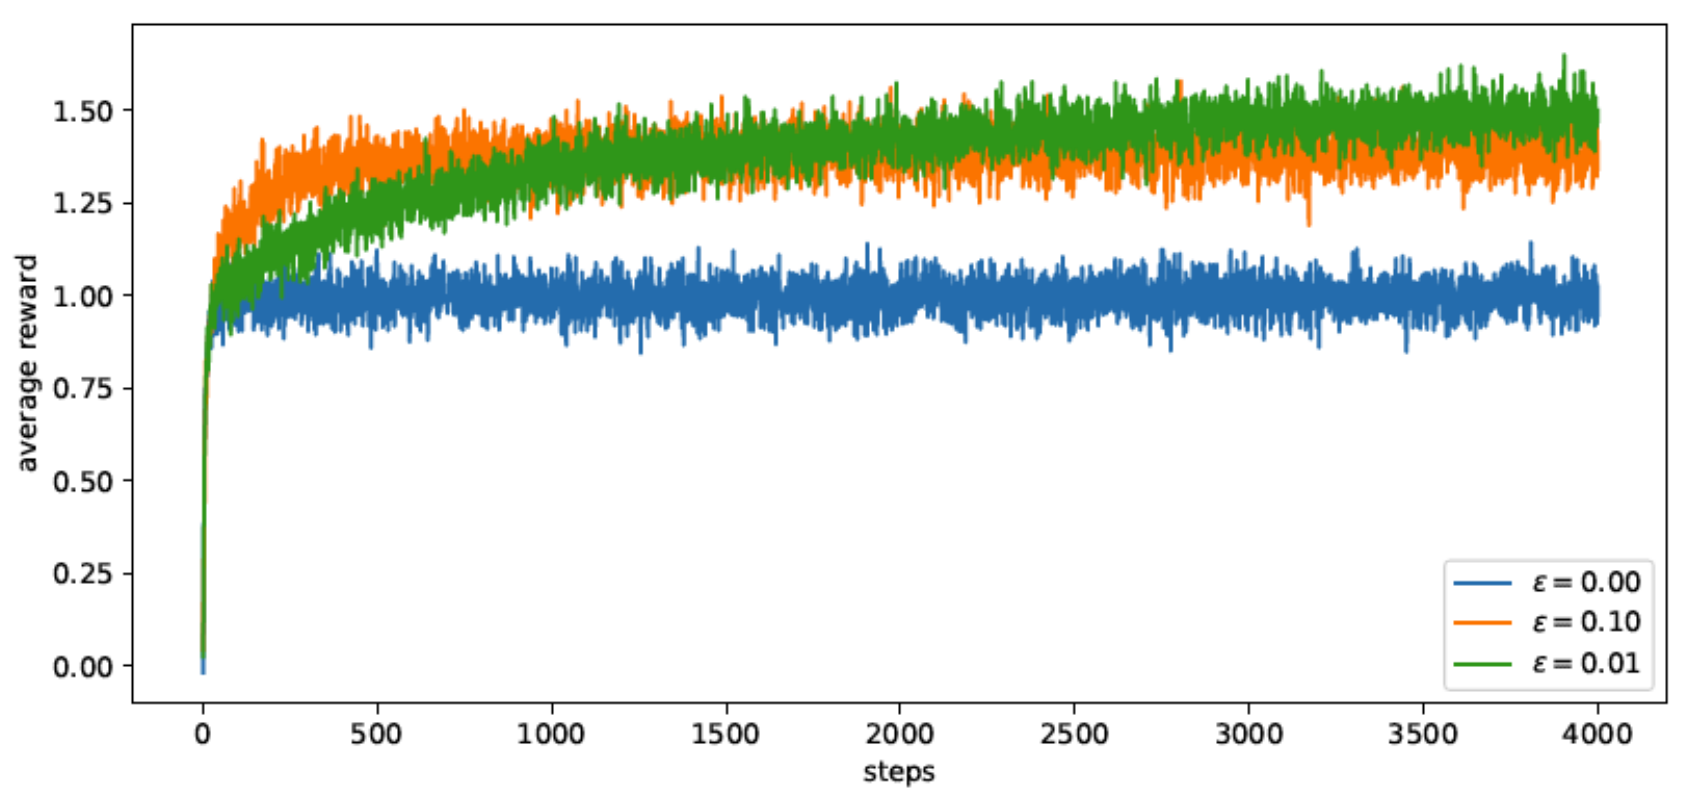

In [4]:
display(Image("./images/RL_epsilon_greedy.png", width=600))

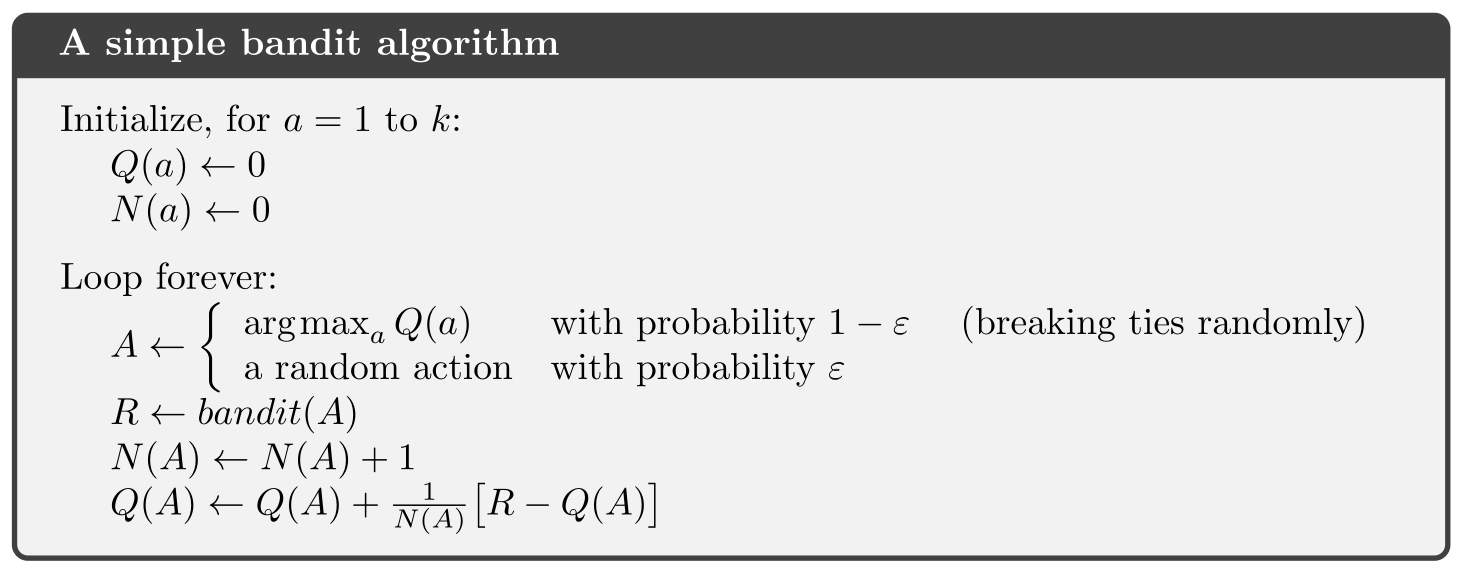

In [5]:
display(Image("./images/RL_bandit_algorithm.png", width=600))

### 1.2.2 OPTIMISTIC INITIAL VALUES

The Optimistic Initial Values policy is another approach to balance exploration and exploitation in the *k-armed bandit* problem.  
The idea is simple: **instead of starting with neutral estimates (e.g., $Q(a)=0$), we initialize all action-value estimates $Q(a)$ to optimistically high values**.

Because the agent starts with the belief that every action will yield a large reward, it will naturally explore different actions in order to verify this assumption.  
As data is collected, the estimated values are updated based on actual rewards, and the estimates for suboptimal actions decrease over time. Once the agent gains enough experience, it will converge toward exploiting the best action.

Thie policy has some limitations:
- Only drive early exploration: once the estimates converge, the method becomes purely greedy and exploration stops.  
- Not suited for non-stationary problems: if reward distributions change over time, the initial optimism cannot adapt.  
- Choice of optimism: it may not be clear what initial value is “optimistic enough” in some applications.  

### 1.2.3 UPPER CONFIDENCE BOUND (UCB) ACTION SELECTION

Unlike $\varepsilon$-greedy or optimistic initialization, UCB explicitly uses uncertainty in the value estimates to guide exploration.

The main intuition is “optimism in the face of uncertainty”. Even if we are uncertain about the true value of an action, we should act as if the most optimistic (plausible) outcome were true.

In other words, **the agent selects the action that could *potentially* yield the highest reward, given both its estimated value and its uncertainty**.

At each step $t$, the selected action is:
$$
A_t = \arg\max_a \left[ Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a)}} \right]
$$

where:

- **$Q_t(a)$** → current estimated value of action *a*
- **$N_t(a)$** → number of times action *a* has been selected up to time *t*  
- **$t$** → total number of time steps (episodes) so far  
- **$c > 0$** → controls the degree of exploration (larger *c* = more exploration)  

Interpretation:
- The first term $Q_t(a)$ represents exploitation (how good we think the action is).  
- The second term $c \sqrt{\frac{\ln t}{N_t(a)}}$ represents exploration (how uncertain we are about the action).  
  - It decreases as $N_t(a)$ increases → the more we sample an action, the more confident we become.  
  - The $\ln t$ term ensures that even actions not selected for a while get reconsidered occasionally.  

Thus, UCB naturally balances exploration and exploitation: it favors actions that have high estimated rewards or high uncertainty, leading to efficient exploration without randomization.

### 1.2.4 GRADIENT BANDIT ALGOTIHMS (GBA)

In this method, **the agent maintains a preference value $H_t(a) \in \mathbb{R}$ for each action $a$**.  
- The larger the preference $H_t(a)$, the more likely the action is to be chosen.  
- These preferences are not directly interpretable as rewards — only their relative values matter.  

**To convert preferences into probabilities, GBA uses the softmax distribution**:

$$
\pi_t(a) = \frac{e^{H_t(a)}}{\sum_{b=1}^k e^{H_t(b)}}
$$

where $\pi_t(a)$ is the probability of selecting action $a$ at time $t$.  

Thus, actions with higher preferences are chosen more often, but all actions retain a nonzero probability of being explored.

#### UPDATE PROCEDURE 

The goal of GBA is to maximize the expected reward by performing gradient ascent on the policy’s performance measure.  
We start by initializing all preferences equally, e.g. $ H_1(a) = 0 \quad \forall a $.  
Then, after selecting action $A_t$ and receiving reward $R_t$, the preferences are updated as:

$$
H_{t+1}(a) =
\begin{cases}
H_t(A_t) + \alpha (R_t - \bar{R}_t) (1 - \pi_t(A_t)) & \text{for selected } A_t \\
H_t(a) - \alpha (R_t - \bar{R}_t) \pi_t(a) & \text{for all } a \neq A_t
\end{cases}
$$

where:
- **$\alpha$** is the step-size parameter (learning rate)  
- **$\bar{R}_t$** is the average of all rewards up to time $t$, serving as a baseline

If $R_t$ is greater than $\bar{R}_t$, the chosen action’s preference increases (and others decrease).  
If $R_t$ is less than $\bar{R}_t$, the preference for that action decreases.  

This baseline stabilizes learning and ensures that updates depend on relative performance, not absolute reward magnitude.

---

---

---

---

# 02 - MARKOV DECISION PROCESSES (MDPs) and BELLMAN EQUATIONS

### 2.0 INTRODUCTION

Up to now, multi-armed bandits have helped us introduce key concepts such as the exploration–exploitation dilemma.  
However, in that setting:
- There is only one state, so the same action is always optimal.  
- Actions do not affect future rewards — each decision is independent.  

This is not representative of real-world decision-making problems, where actions have long-term consequences.  
To capture this dynamic nature, we move to Markov Decision Processes (MDPs) — the foundation of Reinforcement Learning.
MDPs provide a mathematical framework to describe the agent–environment interactions over time.

Before defining Markov Decision Processes (MDPs), we start from simpler structures that build up to them:
1. Markov Processes  
2. Markov Reward Processes  
3. Markov Decision Processes

We will first consider the **fully observable case**, where the agent has complete knowledge of the environment — meaning that the *current state completely characterizes the process*.  
MDPs represent a general framework for almost all Reinforcement Learning problems:  
- *Optimal control* corresponds to continuous MDPs (extensions of what we study here).  
- *Bandits* can be seen as one-state MDPs.  
- **When the environment is not fully observable, we move to *extensions* such as POMDPs**.

### 2.1 MARKOV PROCESSES (OR MARKOV CHAINS)

We always assume that **a state is a *Markov state***, meaning it contains all the useful information from the past. In other words, the **future depends only on the present, not on the entire history**.  
A state $s_t$ is *Markov* if and only if:

$$
P(S_{t+1} | S_t) = P(S_{t+1} | S_1, S_2, \ldots, S_t)
$$

In a (simple) Markov Process, we do not yet have *actions* or *rewards* — the agent has no control or goal.  
The system evolves automatically according to transition probabilities between states.  
The transitions from one state $s$ to its successor $s'$ are determined by a **state transition probability matrix** $\mathcal{P}$, whose entries are:

$$
P_{ss'} = P(S_{t+1} = s' \,|\, S_t = s)
$$

The i-th row of $\mathcal{P}$ represents all possible transitions from the i-th state (to all the others) and **sums to 1**.  
The j-th column represents all possible transitions going to the j-th state (from all the others).  
For example $\mathcal{P}_{12}$ is the probability of transistion from state 1 to state 2, and it is located in row 1, column 2.

In the end, a Markov Process is a *memoryless random process* — a sequence of random states $S_1, S_2, \ldots$ satisfying the Markov Property.

Formally, **a Markov Process is defined as the tuple $ \langle \mathcal{S}, \mathcal{P} \rangle$**, where:  
- $\mathcal{S}$ is a *finite* set of states  
- $\mathcal{P}$ is the *state transition probability matrix*, with entries $P_{ss'} = P(S_{t+1} = s' | S_t = s)$
- 
There are scenarios where probabilities change over time. These are non-stationary Markov Process versions.

In this stage, we are still modeling the dynamics of the environment — the agent will be introduced later, when actions and rewards come into play.

Below you can see of an example of markov chain (right) with the transition probability matrix (left).

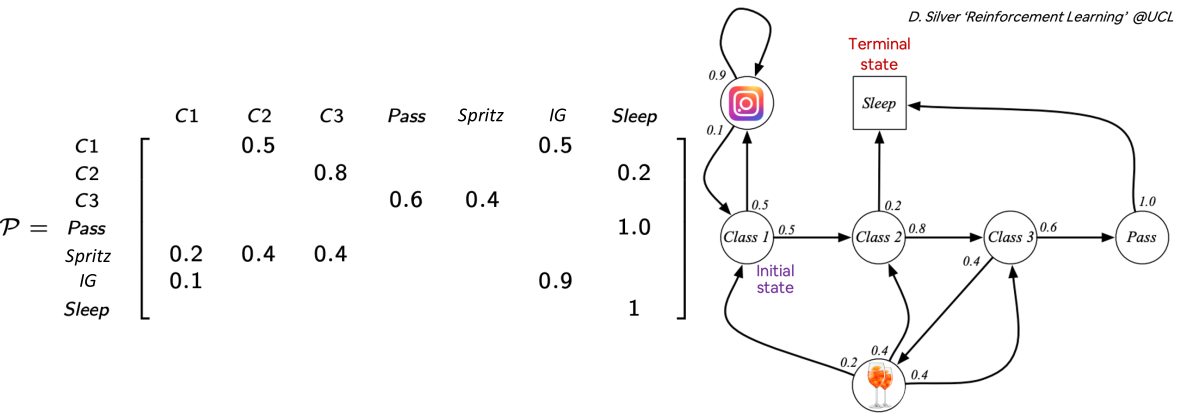

In [4]:
display(Image("./images/RL_student_markov_chain.png", width=800))

### 2.2 MARKOV REWARD PROCESSES

Let’s add rewards: a Markov Reward Process (MRP* is a Markov Chain with reward values.  
We define the **reward function** as (the immediate reward received in that state):
$$\mathcal{R}_s = \mathbb{E}[R_{t+1} | S_t = s] $$

**A Markov Reward Process is a tuple  $ \langle \mathcal{S}$, $\mathcal{P}$, $\mathcal{R}$, $\gamma \rangle $** such that:
- $\mathcal{S}$ is a finite set of states  
- $\mathcal{P}$ is a state transition probability matrix with entries $P_{ss'} = P(S_{t+1} = s' | S_t = s)$
- $\mathcal{R}$ is a reward function: $\mathcal{R}_s = \mathbb{E}[R_{t+1} | S_t = s] $ (watch out: $R_{t+1}$ is the reward for being in state $S_t$!!)
- $\gamma$ is a **discount factor**, $\gamma \in [0, 1] $

#### RETURN

The **Return** $G_t$ represents the *total amount of reward* the agent can expect to collect from time step *t* onward. It combines all future rewards into a single number, while applying a discount factor to make **future rewards ($R_{t+2}, R_{t+3}...$) count less than immediate ones ($R_{t+1}$)**. In reinforcement learning, the goal is not to maximize a single reward, but to **maximize the return**.  
$$
G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \dots = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}
$$

where $\gamma \in [0,1]$ is the **discount factor, and represents the *present value* of future rewards**:  
- 𝛾 = 0 → *myopic*: only immediate rewards matter  
- 𝛾 = 1 → *far-sighted*: all rewards are equally valuable, even distant ones

**Warning**: in general in MDPs $R_{t+1}$ refers to the reward you obtain after choosing an action $A_t$ in state $S_t$ and going to state $S_{t+1}$. So the reward depends on the chosen action and the resulting transition. But here we are still talking abuot MRPs, where there is not action, only states and rewards. So only for this paragraph we assume the reward is obtained by only being in a state, the immediate reward received in that state. So $R_{t+1}$ refers to the reward given by after being in state $s$ at time $t$, not the one obtained from state $s'$ at time $t+1$.

Why Discounts?
- Mathematically convenient → prevents infinite returns in processes with cycles  
- Models uncertainty about the future  
- Inspired by finance → immediate rewards may yield higher interest  
- Reflects real-world behavior → humans and animals often prefer immediate rewards  
- General formulation → when 𝛾 = 1, we recover the **undiscounted** Markov Reward Process

#### VALUE FUNCTION

The **value function** $v(s)$ gives the long-term value of a state *s*. It represents the **expected return starting from state s**, in terms of expected return. An example could be evaluating the state of a chess board. Note that instead the $q-value$ function was about state and action as a couple. Definition:  
$$
v(s) = \mathbb{E}[G_t \,|\, S_t = s]
$$
Note that the expectation is fundamental — we are dealing with stochastic environments.


### EXAMPLE of MRP: STUDENT MARKOV CHAIN
Consider the Markov Reward Process in the image below. It's a process modeling the choices of a student following lectures and studying for an exam. In red are the rewards (see the *warning* in previous paragraph). *Sleep* is the terminal node of our chain.  
As discount factor we assume $\gamma = 1/2$.  
We estimate the return $G_t$ for state $C1$ using several sample episodes:

1. Episode 1: C1 → C2 → C3 → Pass → Sleep  
   $$
   v(C1) = -2 - \frac{2}{2} - \frac{2}{4} + \frac{10}{8} = -2.25
   $$

2. Episode 2: C1 → IG → IG → C1 → C2 → Sleep  
   $$
   v(C1) = -2 - \frac{1}{2} - \frac{1}{4} - \frac{2}{8} - \frac{2}{16} = -3.125
   $$

3. Episode 3: C1 → C2 → C3 → Spritz → C2 → C3 → Pass → Sleep  
   $$
   v(C1) = -2 - \frac{2}{2} - \frac{2}{4} + \frac{1}{8} - \frac{2}{16} - \frac{2}{32} + \frac{10}{64} = -3.41
   $$

4. Episode 4: C1 → IG → IG → C1 → C2 → C3 → Spritz → C1 → IG → IG → IG → C1 → C2 → C3 → Spritz → C2 → Sleep  
   $$
   v(C1) = -2 - \frac{1}{2} - \frac{1}{4} - \frac{2}{8} - \frac{2}{16} + \dots = -3.20
   $$

If we have multiple episodes starting from a state $s$, we can estimate its value function $v(s)$ by taking the sampled average of the returns observed from that state.

For example, using the episodes from the previous example for state $C1$:
$$
v(C1) \approx \frac{-2.25 - 3.125 - 3.41 - 3.20}{4} = -3
$$

While we can estimate the value of a state using the sampled average of returns, this approach has limitations:  
- Collecting enough samples for every state can be very costly in practice, especially in large or continuous environments.  
- **Reinforcement Learning is not just about estimating values; the real goal is to learn the best strategy (policy) that maximizes cumulative reward** over time.  

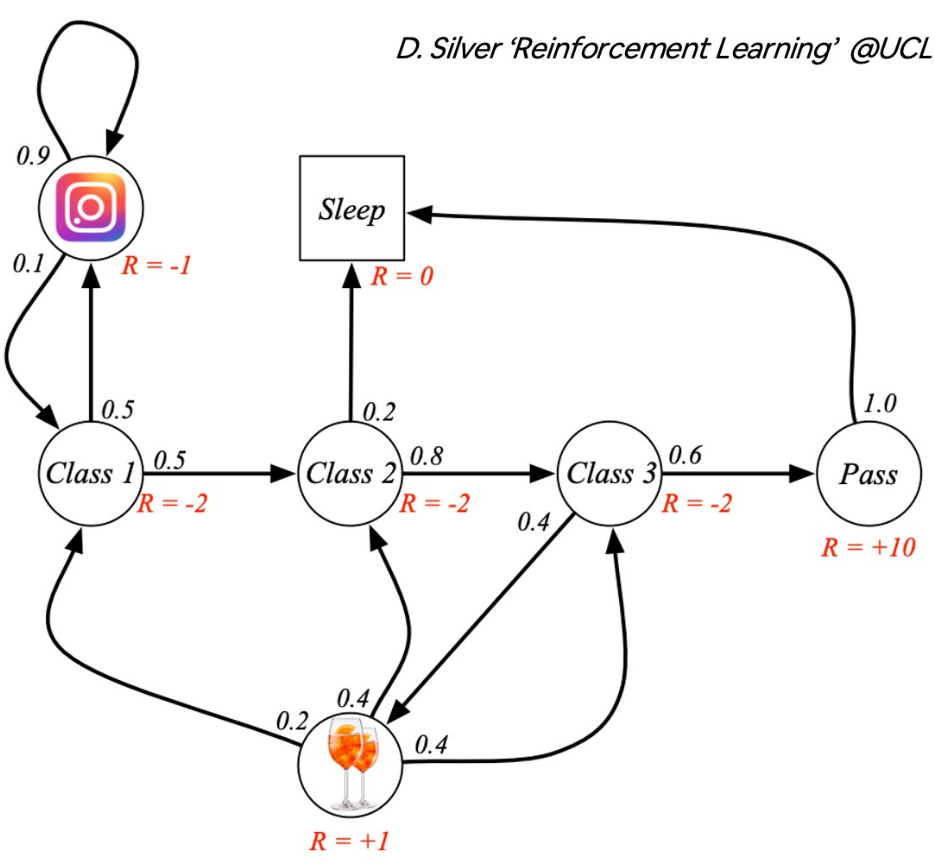

In [5]:
display(Image("./images/RL_student_MC_example.png", width=400))

### 2.2.1 BELLMAN EQUATION (EQ1)

The three Bellman Equations are a fundamental tool for solving Markov Reward Processes (MRPs) and Markov Decision Processes (MDPs) due to their **recursive nature**. They express the value of a state (or state-action pair) in terms of immediate rewards and the values of successor states.

| Type | Purpose | Properties / Notes |
|------|---------|------------------|
| MRP Bellman equation | Finding value functions | **Linear**; can be solved directly for small MRPs; iterative methods needed for large MRPs |
| MDP Bellman expectation equation | Finding value functions and action-value functions. They holds for a generic policy and are a way to recursively define $v_{\pi}(s)$ and $q_\pi(s,a)$, given the policy $\pi$ | **Linear**; can be solved directly for small MDPs; iterative methods needed for large MDPs |
| MDP Bellman optimality equation | Finding optimal value functions and optimal action-value functions | **Non-linear**; iterative approaches required even for small MDPs |

Exploiting:
$$
G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} \dots =  R_{t+1} + \left( \gamma R_{t+2} + \gamma R_{t+3} \dots \right) = R_{t+1} + \gamma G_{t+1}
$$

We then obtain the **Bellman equation** (the first of the three), that allows us to compute the value function $v(s)$ on the state $s$
$$
v(s) = \mathbb{E}[G_t \mid S_t = s] = \mathbb{E}[R_{t+1} + \gamma G_{t+1} \mid S_t = s] = \mathbb{E}[R_{t+1} + \gamma v(S_{t+1}) \mid S_t = s]
$$
>We can rewrite the first Bellman equation in this operative form:
$$
v(s) = \mathcal{R}_s + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}v(s')
$$
where $\mathcal{R}_s$ is the reward of the state $s$ (see the *warning* in the above paragraph), and $\mathcal{P}_{ss'}$ the transition proability from state $s$ to $s'$.

This shows that **the value of a state is directly related to the expected immediate reward plus the discounted value of the next state. Note that the next state $S_{t+1}$ could be any state that can follow $S_t$, so we operate an expectation on it, which is a function of all other states**. Conceptually, the Bellman equation can be seen as a one-step look-ahead search, which forms the basis for many RL algorithms.

In matrix form, the Bellman equation can be written compactly as:

$$
\mathbf{v} = \mathbf{R} + \gamma \mathbf{P} \mathbf{v}
$$

where $\mathbf{v}$ is the column vector of state values, $\mathbf{R}$ is the vector of expected immediate rewards, and $\mathbf{P}$ is the state transition probability matrix. The situation looks good because this is a linear system, very easy to solve. But the problem is that in real RL problems we don't know $\mathbf{R}$ and $\mathbf{P}$. For MDPs, the equations become non-linear when computing optimal value functions and require iterative approaches.

### 2.3 MARKOV DECISION PROCESSES (MDPs)

A Markov Decision Process extends a Markov Reward Process by adding actions and decisions (agency = capacity of the agent to make decisions), representing a true reinforcement learning problem.

An MDP is a tuple $ \langle \mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{R}, \gamma \rangle$ where:  
- $\mathcal{S}$ is a finite set of states  
- $\mathcal{A}$ is a finite set of actions  
- $\mathcal{P}$ is a state transition probability matrix with entries $\mathcal{P}_{ss'}^a = \mathbb{P}[S_{t+1}=s' \mid S_t=s, A_t=a]$  
- $\mathcal{R}$ is a reward function, $\mathcal{R}_s^a = \mathbb{E}[R_{t+1} \mid S_t=s, A_t=a]$ representing the immediate reward (?)
- $\gamma \in [0,1]$ is the discount factor  

Now transition probabilities and rewards don't depend only on state, but also on the action!  
With MDPs, the agent has control and agency: we can define a policy to maximize cumulative reward.

#### POLICIES in MDPs

Remember, a policy $\pi$ is a distribution over actions given the current state:  $ \quad \pi(a \mid s) = \mathbb{P}[A_t = a \mid S_t = s]$  

- A policy fully defines the behavior of an agent.  
- MDP policies depend only on the current state (Markov property) and are stationary (do not explicitly depend on time $t$).  
- Stochastic policies allow for exploration and can be updated across episodes.  

Given an MDP $ \langle \mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{R}, \gamma \rangle $ and a policy $\pi$:  
- The state sequence $S_1, S_2, \dots$ forms a Markov Process with **transition probabilities given by the weighted sum of all the transition probabilities from state $s$ to state $s'$ (they are different for each action), using as weights the probabilities assigned by the policy to each action**:
$$\mathcal{P}_{ss'}^{\pi} = \sum_{a \in \mathcal{A}} \pi(a \mid s) \mathcal{P}_{ss'}^a$$  
- The state and reward sequence $(S_1, R_1, S_2, \dots)$ forms a Markov Reward Process with **expected rewards given (similarly to before) by the weighted sum over the possible rewards of different actions**:
$$\mathcal{R}_s^{\pi} = \sum_{a \in \mathcal{A}} \pi(a \mid s) \mathcal{R}_s^a$$


#### VALUE FUNCTIONS in MDPs

Now that the agent has agency (capacity of the agent to make decisions), the value of a state depends on the policy being followed.

- State-value function $v_\pi(s)$: expected return from state $s$ following policy $\pi$  . This gives us **a metric to evaluate the best policy**. 
$$v_\pi(s) = \mathbb{E}_\pi[G_t \mid S_t = s]$$  

- Action-value function $q_\pi(s, a)$: expected return from state $s$ if the agent takes action $a$ and then follows policy $\pi$ from there onwards  
$$q_\pi(s, a) = \mathbb{E}_\pi[G_t \mid S_t = s, A_t = a]$$  

It's important ot note that value $v_\pi(s)$ does depend on the policy. For example if we see a chess board we could estimate the chanche of winning for the white player. But that also depends on who is playing (you or Magnus Carlsen), and that is the policy.

### 2.3.1 BELLMAN EXPECTATION EQUATION (EQ2)

Now that we have actions and policies, the state-value function is $v_\pi(s)$ (and not $v(s)$):
$$
v_{\pi}(s) = \mathbb{E}[G_t \mid S_t = s] = \mathbb{E}[R_{t+1} + \gamma G_{t+1} \mid S_t = s] = \mathbb{E}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) \mid S_t = s]
$$

Similarly, the action-value function $q_\pi(s,a)$ is defined as:

$$
q_\pi(s,a) = \mathbb{E}_\pi \left[ R_{t+1} + \gamma q_\pi(S_{t+1}, A_{t+1}) \mid S_t = s, A_t = a \right]
$$

In the images below you can see how to derive the **Bellman Expectation Equations**.: 
$$
v_\pi(s) = \sum_{a \in \mathcal{A}} \pi(a \mid s)
\Big[ \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \, v_\pi(s') \Big]
$$
$$
q_\pi(s,a) = \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \sum_{a' \in \mathcal{A}} \pi(a'|s') q_\pi(s',a')
$$

They are called like that because **they express the value functions in terms of expected values over the next state and action distributions given the policy $\pi$**. They holds for
a generic policy and are a way to recursively define $v_{\pi}(s)$ and $q_\pi(s,a)$.  
They express that the value of a state or action equals the immediate reward plus the discounted expected value of the next states.  
Note that with these equations we only obtain the value functions when the policy is given. To have a way to find the best policy, we need the third Bellman equation(s).

We can also write the Bellman Expectation Equation in matrix form, using the induced Markov Reward Process from a policy $\pi$:
$$
\mathbf{v}_\pi = \mathbf{R}^\pi + \gamma \mathbf{P}^\pi \mathbf{v}_\pi
$$
As said before, we will not solve this directly.

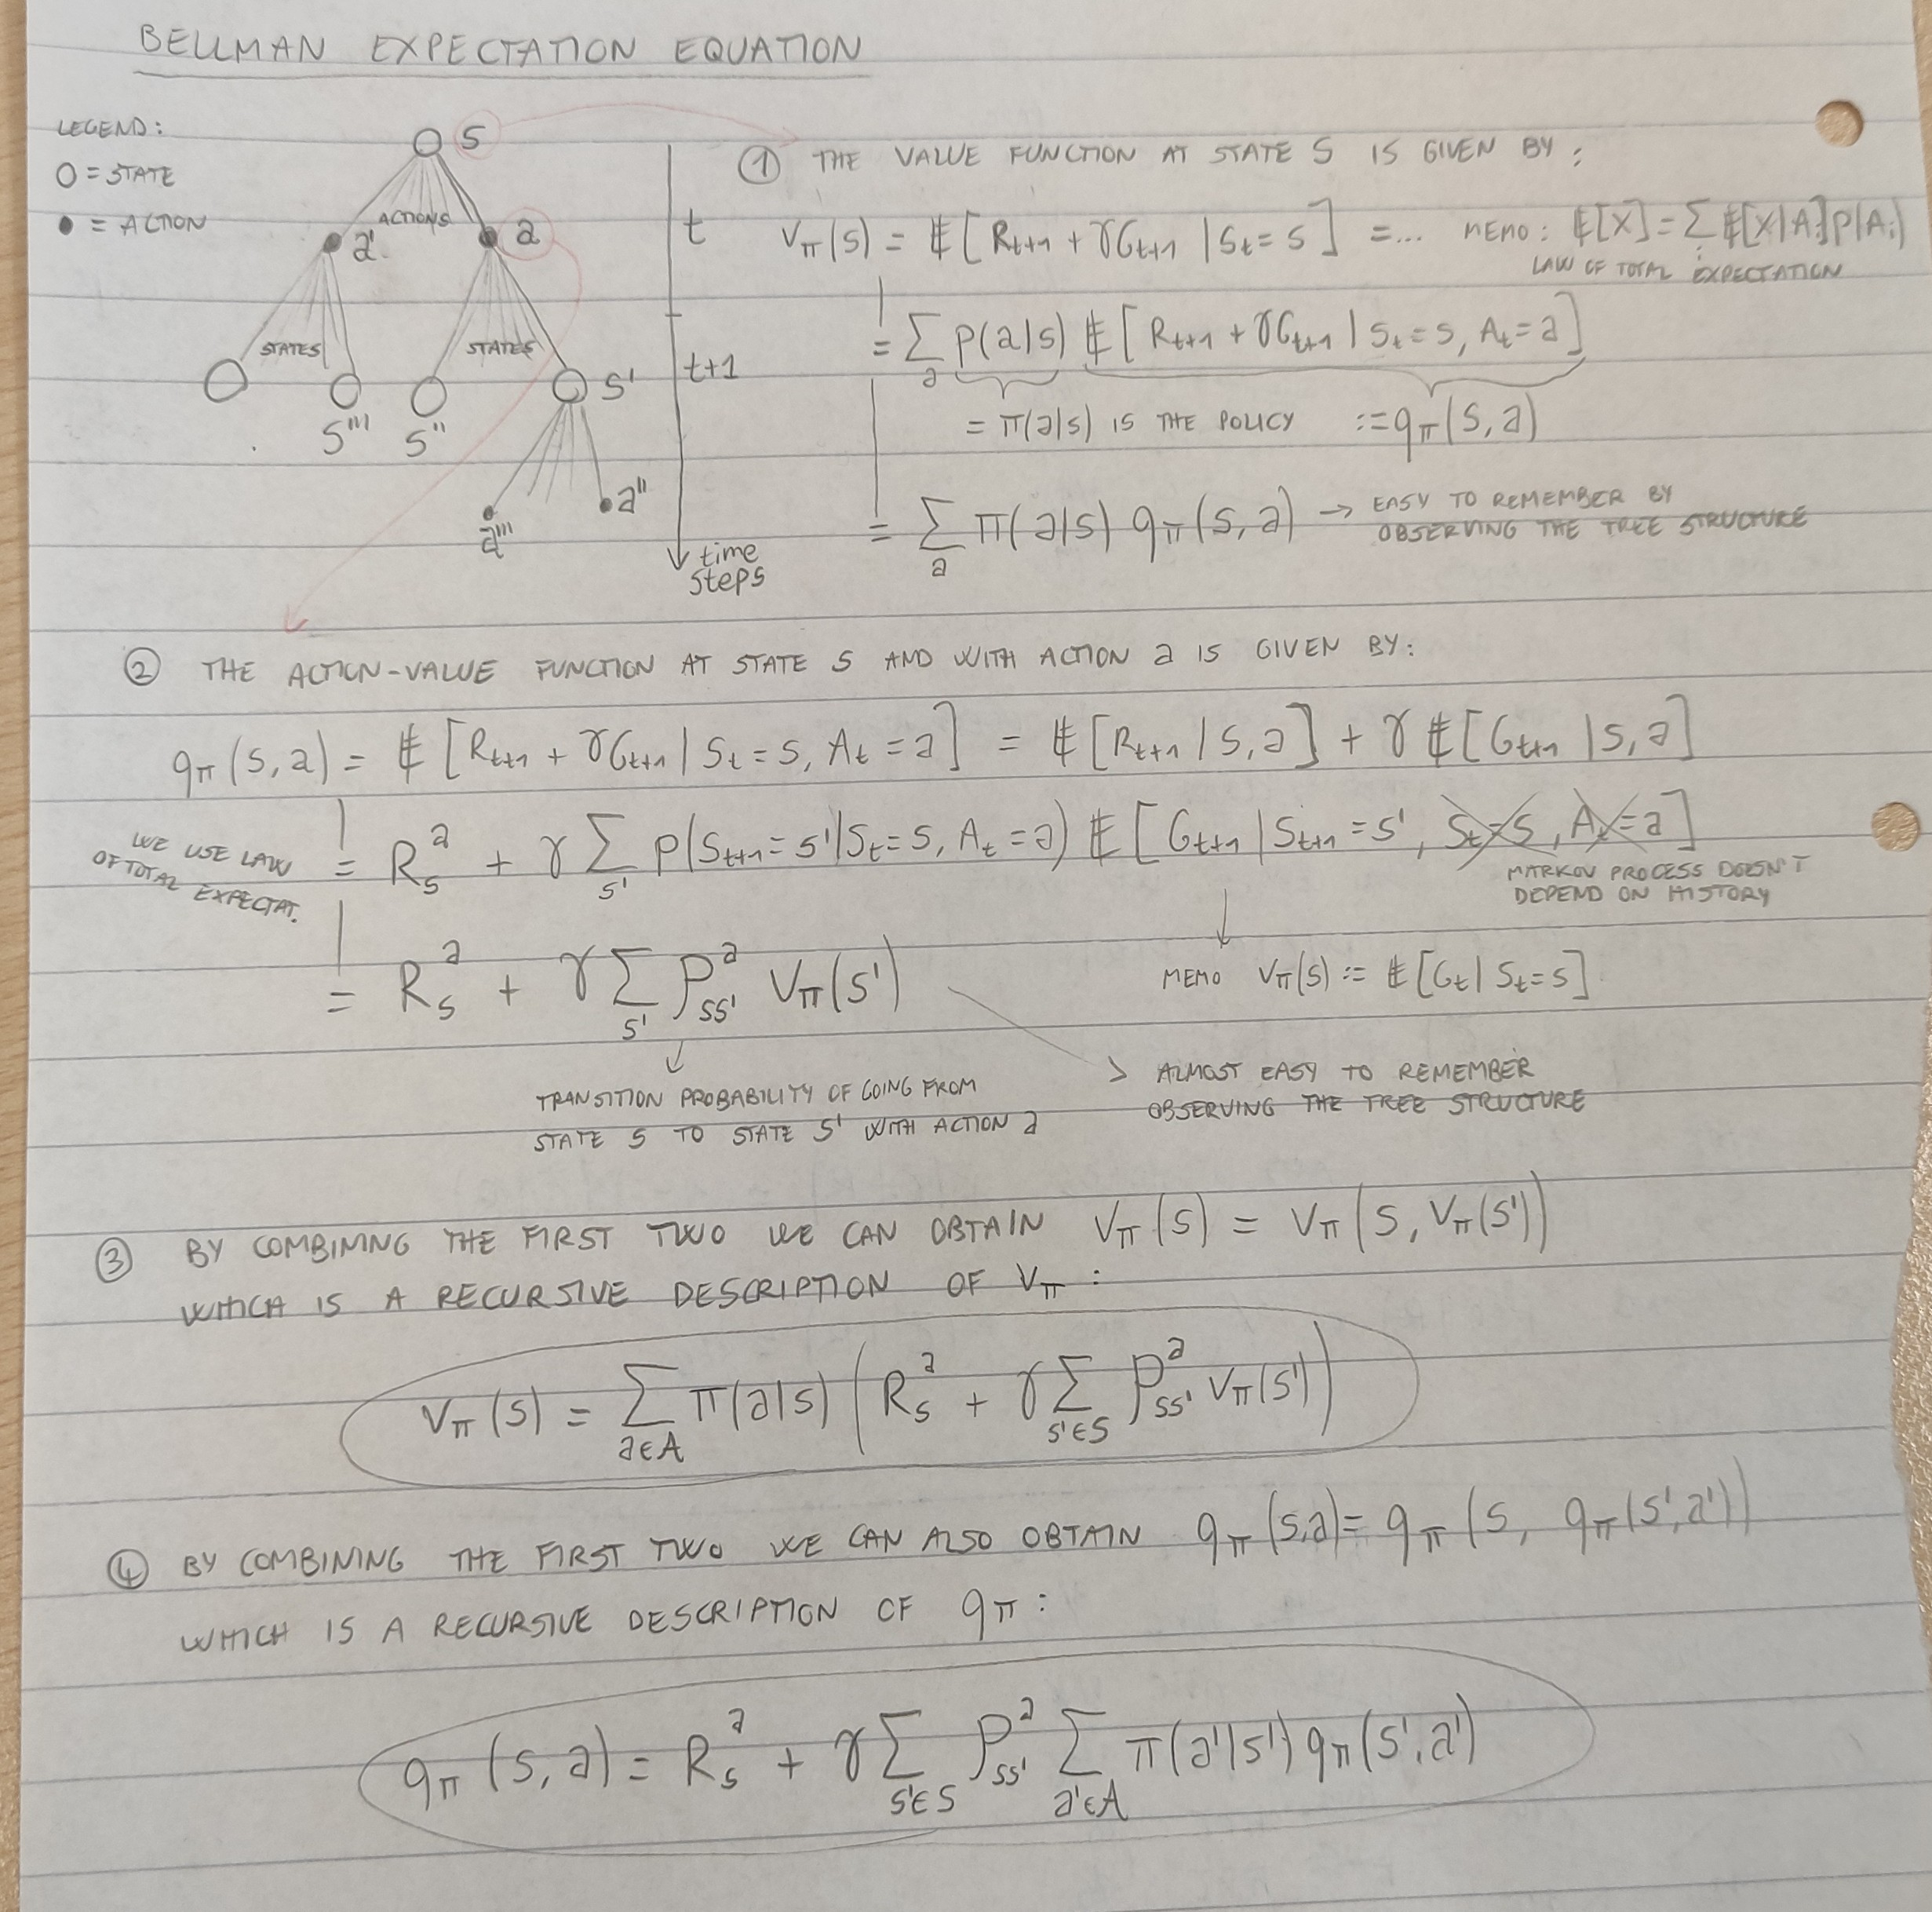

In [3]:
display(Image("./images/RL_bellman_eq2.jpg", width=800))

### EXAMPLE of MDP: STUDENT MARKOV CHAIN

In this example (image below) similar to the one before, we represent also actions (shown with a black dot). The states themselves are not explicitly drawn.  
We consider an undiscounted Markov Decision Process, meaning the discount factor is $\gamma = 1$.

The agent follows a uniform random policy: for each state $(C1, IG, C2, C3)$, there are two possible actions, and each is chosen with equal probability.
$$
\pi(a|s) = 0.5 \quad \text{for all } a, s
$$

Let’s analyze the state C3. Using the recursive definition of the value function under policy $\pi$, we can verify that: $ v_\pi(C3) = 7.4 $

In detail, using the formula in the violet square, we compute it as:
$$
v_{\pi}(\text{old state}) = \sum_{\text{each action}} \text{Prob(action)} \cdot 
\left( \text{Reward(action)} + 
\sum_{\text{ending states}} \text{Prob(new state)} \cdot v_{\pi}(\text{new state}) \right)
$$

so in our case we have the probability of each action fixed at $0.5$ and from stte $C3$ we can take two actions:
- *Study* with reward $+10$, ending up to terminal state
- *Spritz* with reward $+1$, having 3 possibilities for the final state

Thus the computation is:
$$
v_{\pi}(\text{old state}) = 7.4 = 0.5 \cdot (10 + 0) + 0.5 \cdot \Big( 1 + (0.4 \cdot 7.4 - 0.2 \cdot 1.3 + 0.4 \cdot 2.7 ) \Big)
$$

This shows how the value of a state depends on both immediate rewards and the expected values of successor states, weighted by the transition probabilities and policy.


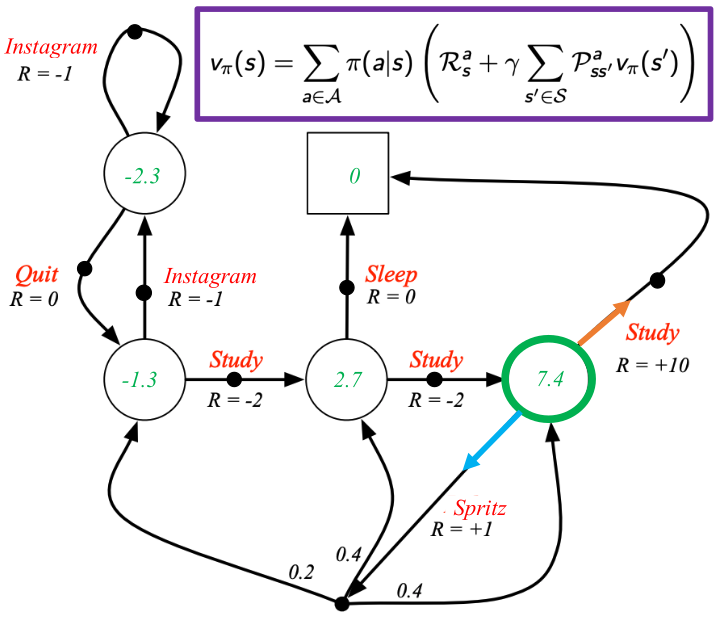

In [4]:
display(Image("./images/RL_MDP_example.png", width=400))

### 2.4 OPTIMAL VALUE FUNCTIONS

In Reinforcement Learning, we are often interested not just in evaluating a given policy, but in **finding the best possible policy**. To formalize this, we define the optimal value functions.

The **optimal state-value function** $v_*(s)$ is the maximum value achievable from state $s$ over all possible policies:
$$
v_*(s) = \max_\pi v_\pi(s)
$$

Similarly, the **optimal action-value function** $q_*(s,a)$ is the maximum expected return achievable by taking action $a$ in state $s$ and then following the best policy:

$$
q_*(s,a) = \max_\pi q_\pi(s,a)
$$

Knowing the optimal action-value function $q_*(s, a)$ means the problem is solved: from each state, the agent can simply choose the action that gives the maximum expected return.

### 2.5 BELLMAN OPTIMALITY EQUATIONS (EQ3)

The ultimate goal in an MDP is to find a policy that maximizes long-term reward. We compare policies by their state-value functions: say $\pi \ge \pi'$ if $v_{\pi}(s) \ge v_{\pi'}(s)$ for all states $s$. An optimal policy is one that is at least as good as any other policy according to this ordering.

If the optimal action-value function $q_*(s,a)$ is known, an optimal (deterministic) policy can be obtained simply by choosing the maximizing action in each state:
$$
\pi_*(a|s) =
\begin{cases}
1 & \text{if } a = \arg\max_a q_*(s,a) \\
0  & \text{otherwise }
\end{cases}
$$
In fact, there always exists at least one deterministic optimal policy for any MDP (this is a proved theorem).

The **Bellman optimality equations provide a recursive characterization of these optimal value functions. They do it by apllying the *max* function instead of averaging.**
$$
v_*(s) = \max_a \mathcal{R_s^a} + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P_{ss'}^a} v_*(s')
$$
$$
q_*(s,a) = \mathcal{R_s^a} + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P_{ss'}^a} \max_{a'} q_*(s', a')
$$

**Because of the $\max$ operator these equations are not linear do not admit a simple closed-form solution in general. Practically, we solve them with iterative algorithms** that alternate evaluation and improvement steps or perform direct updates. Common methods include value iteration, policy iteration, and model-free algorithms such as Q-learning and SARSA. These algorithms use the Bellman optimality principle as the basis for progressively improving value estimates and policies until (approximate) optimality is reached.



---

***

***

---

# 03 - DYNAMIC PROGRAMMING (DP)

### INTRODUCTION

Until now, we have introduced Markov Decision Processes (MDPs) as a formal framework for Reinforcement Learning problems.  
An MDP, defined by $(\mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{R}, \gamma)$, allows us to model decision-making in an environment that evolves probabilistically.  
However, in real RL problems, $\mathcal{P}$ and $\mathcal{R}$ are usually unknown.  
For now, we will focus on the easier case where they are known, and we want to solve the MDP — that is, find how to act optimally.

There are two main tasks when working with MDPs:

1. **Policy evaluation (or prediction):** We want to understand how good a policy $\pi$ is by computing its value functions $v_\pi(s)$ and $q_\pi(s,a)$. Here the Bellman Expectation Equation will help us.

   Input: MDP and a policy $\pi$  
   Output: $v_\pi(s)$ and/or $q_\pi(s,a)$  

2. **Policy improvement (or control):**  We want to improve the current policy to find the optimal one, $\pi_*$, which maximizes expected return. Here the Bellman Optimality Equation will help us.

   Input: MDP  
   Output: $\pi_*$, and optionally $v_*(s)$ and/or $q_*(s,a)$  

Even when $\mathcal{P}$ and $\mathcal{R}$ are known, solving these problems is not always straightforward.  
The evaluation problem can sometimes be expressed as a set of linear equations, but in most cases we need **Dynamic Programming (DP)** — especially since the Bellman *optimality* equation is nonlinear.

Dynamic Programming builds directly on these recursive relationships.

### 3.1 DEFINITION OF DYNAMIC PROGRAMMING

**Dynamic Programming (DP) is a family of methods designed to solve complex problems by breaking them into simpler subproblems** — a *divide and conquer* approach.  
**It is built directly on the recursive relationships of the Bellman equations**. It basically works like this:
1. Divide the original problem into smaller subproblems (for example, to find the best path from New York to Los Angeles, you must pass through Chicago)
2. Solve the smaller subproblems (find the best path from New York to Chicago, and from Chicago to Los Angeles)
3. Combine the subproblem solutions to solve the original one

DP is effective for problems that satisfy two properties:
1. **Optimal substructure:** An optimal solution can be decomposed into optimal solutions of its subproblems (the principle of optimality applies)
2. **Overlapping subproblems:** The same subproblems recur multiple times, so their solutions can be reused (similar to backup diagrams in RL)

MDPs naturally exhibit both properties required for DP. The Bellman equations express recursive relationships between states (optimal substructure). The same states are visited repeatedly during updates (overlapping subproblems).
In DP for MDPs, we assume the environment model $(\mathcal{P}, \mathcal{R})$ is fully known.  
This is often called the *planning problem*, since we can plan ahead given full knowledge of the system.

### 3.2 POLICY EVALUATION (= PREDICTION PHASE)
The goal of policy evaluation is to estimate how good a given policy $\pi$ is. We want to find its value function $v_\pi(s)$, which satisfies the Bellman expectation equation.  
However, instead of solving this equation directly (which would require solving a large system of linear equations), **we use the Bellman expectation equation as an update rule to iteratively improve our estimate of the value function.** This process is known as **Iterative Policy Evaluation**.  

We start with an initial guess $v_0(s)$ for all states, and repeatedly update it using the Bellman expectation equation until convergence:

$$
v_{k+1}(s) = \sum_{a \in \mathcal{A}} \pi(a \mid s)
\Big[ \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \, v_k(s') \Big]
$$

Here $k$ is the index of update steps. The sequence $\{v_k\}$ converges to the true value function $v_\pi$ as $k \to \infty$.  

#### SYNCHRONOUS VS IN-PLACE UPDATES

When implementing iterative policy evaluation, there are two main ways to perform updates over all states.
- *Synchronous* case:
    - Two separate copies of the value function are kept: one for the old values $v_k$ and one for the new values $v_{k+1}$.
    - **All state values are updated simultaneously using only the values from the previous iteration**.
    - This ensures each update step is consistent with the same $v_k$, but it may converge more slowly in practice.
- *In-place* (aynchronous) case:
    - Only one copy of the value function is stored.
    - **As soon as a new value for a state $s$ is computed, it is immediately used for updating subsequent states**.
    - This means that newer, more accurate estimates are used within the same iteration.
    - Generally lead to faster convergence

In practice, reinforcement learning algorithms almost always use in-place updates, since they are more efficient and converge faster.  
We can see the detailed algorithm in the image below:
- The outer loop controls the iteration count.  
- The inner loop cycles through all the states, updating their values in place as soon as new estimates are available. 
- The parameter $\theta$ is a user-defined small threshold that determines the stopping criterion.  
- The variable $\Delta$ tracks the maximum change in the value function between two iterations and is compared with $\theta$ to check for convergence.  
- A good practice for initializing $v(s)$ is to use optimistic initialization, which encourages exploration early on.

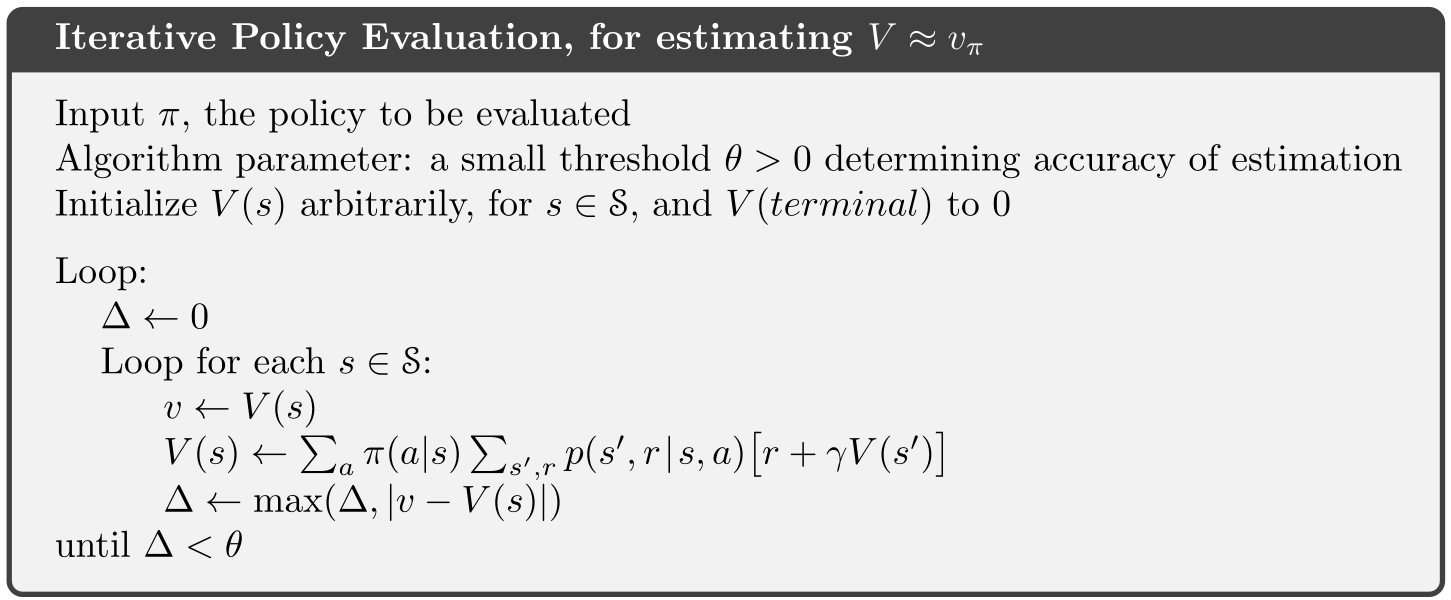

In [3]:
display(Image("./images/RL_policy_evaluation_algorithm.png", width=700))

#### EXAMPLE: SYNCHRONOUS VS IN-PLACE UPDATES

Let’s consider a simple Markov Decision Process with three states: $S = \{A, B, C\}$.  
For simplicity, we use a deterministic policy: so $\pi(a \mid s)=1$, i.e. one fixed action per state, which also mean $\mathcal{P_{ss'}^a}=1$.  
We take a discount factor $\gamma = 0.9$.  
Our goal is to estimate $v_\pi(s)$ for each state.  
The rewards and transitions are:

| Current state | Next state | Reward |
|----------------|-------------|---------|
| A | B | +1 |
| B | C | +2 |
| C | C | 0 |



In this example the update rule for the state $s$ is:
$$
v_{k+1}(s) = \mathcal{R}(s) + \gamma \, v_k(s')
$$

So we have:
$$v_{k+1}(A) = 1 + 0.9 \, v_k(B)$$
$$v_{k+1}(B) = 2 + 0.9 \, v_k(C)$$
$$v_{k+1}(C) = 0 + 0.9 \, v_k(C)$$ 

We initialize all values to zero: $v_0(A) = v_0(B) = v_0(C) = 0$.

For the *synchronous* case, at each iteration we compute all $v_{k+1}(s)$ using only the values from the previous iteration $v_k$.

* Iteration 1 (from $v_0 = [0, 0, 0]$):
    - $v_1(A) = 1 + 0.9 \cdot v_0(B) =  1 + 0.9 \cdot 0 = 1$  
    - $v_1(B) = 2 + 0.9 \cdot v_0(C) =  2 + 0.9 \cdot 0 = 2$  
    - $v_1(C) = 0 + 0.9 \cdot v_0(C) =  0 + 0.9 \cdot 0 = 0$  
    - Result: $v_1 = [1, 2, 0]$

* Iteration 2 (using $v_1$):
    - $v_2(A) = 1 + 0.9 \cdot v_1(B) =  1 + 0.9 \cdot 2 = 2.8$  
    - $v_2(B) = 2 + 0.9 \cdot v_1(C) =  2 + 0.9 \cdot 0 = 2$  
    - $v_2(C) = 0 + 0.9 \cdot v_1(C) =  0 + 0.9 \cdot 0 = 0$  
    - Result: $v_2 = [2.8, 2, 0]$

For the *in-place* case, we update the states in order, and use new values as soon as they are computed.

* Iteration 1 (starting from $v_0 = [0, 0, 0]$):
    1. Update A: $v(A) = 1 + 0.9 \cdot v(B) = 1$
    2. Update B: $v(B) = 2 + 0.9 \cdot v(C) = 2$
    3. Update C: $v(C) = 0 + 0.9 \cdot v(C) = 0$ -----> Result: $v = [1, 2, 0]$

Note: if a state depends on the value of another state that has already been updated in the same iteration (e.g. if B depended on A like in $v(B) = 2 + 0.9 * v(A) = 2$ ), the in-place update would immediately use the new $v(A)$ value — unlike the synchronous case. This is the difference with the synchronous case!!

* Iteration 2:
    1. Update A: $v(A) = 1 + 0.9 \cdot v(B) = 1 + 0.9 \cdot 2 = 2.8$
    2. Update B: $v(B) = 2 + 0.9 \cdot v(C) = 2 + 0.9 \cdot 0 = 2$
    3. Update C: $v(C) = 0 + 0.9 \cdot v(C) = 0$ -----> Result: $v = [2.8, 2, 0]$

Notice that in this simple example, both methods give the same results per iteration, but in larger MDPs, in-place updates tend to converge faster, since each new estimate is used immediately for the next computations.

### 3.3 POLICY IMPROVEMENT (=CONTROL PHASE) and POLICY ITERATION

Policy improvement is the process of making a policy better based on its current value function. We do this iteratively in a procedure called **policy iteration**. It alternates between policy evaluation and policy improvement and is guaranteed to converge to an optimal policy $\pi_*$.

1. Start with some initial policy $\pi_0$ (can even be random).

2. **Policy evaluation**: compute the value function $v_{\pi_0}(s)$ for all states $s$. This tells us the expected return if we follow $\pi_0$ starting from each state. Formally:
   $$
   v_\pi(s) = \mathbb{E}_\pi \left[ G_t \mid S_t = s \right]
   $$

3. **Policy improvement**: improve the policy by making it greedy with respect to the current value function.  
   For each state $s$, choose the action that maximizes the expected return based on the current value function. This is done for all states simultaneously. It's like asking: “If I look one step ahead, which action would lead to the highest expected return, assuming I keep following the old policy after that?”
   $$
   \pi_{\text{new}}(s) = \arg\max_a \Big[ \mathcal{R}_s^a + \gamma \sum_{s'} \mathcal{P}_{ss'}^a v_{\pi_{\text{old}}}(s') \Big]
   $$

   Watch out: we’re not comparing different policies. We do not need to work with multiple policies at the same time. We’re modifying and improving the starting one locally, by making it greedy with respect to its current value function.
    

5. Repeat evaluation and improvement until the policy stops changing. At this point, we have reached the optimal policy.
   $$
   \pi_{\text{new}} = \pi_{\text{old}} = \pi_*
   $$